## Install prereqisites

In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2024-08-31 10:03:02.562002: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-31 10:03:02.702638: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-31 10:03:02.842933: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-31 10:03:02.983164: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-31 10:03:03.023069: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-31 10:03:03.234458: I tensorflow/core/platform/cpu_feature_gu

## Data Processing

### Training Image Preprossesing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprossesing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in validation_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[128.25 123.25 127.25]
   [132.5  127.5  131.5 ]
   [130.25 125.25 129.25]
   ...
   [141.   139.   144.  ]
   [130.75 128.75 133.75]
   [134.25 132.25 137.25]]

  [[131.   126.   130.  ]
   [132.   127.   131.  ]
   [129.25 124.25 128.25]
   ...
   [136.   134.   139.  ]
   [132.   130.   135.  ]
   [126.5  124.5  129.5 ]]

  [[135.25 130.25 134.25]
   [133.75 128.75 132.75]
   [133.   128.   132.  ]
   ...
   [141.   139.   144.  ]
   [134.5  132.5  137.5 ]
   [134.   132.   137.  ]]

  ...

  [[ 65.75  90.75  59.25]
   [ 72.5   97.25  68.75]
   [ 68.5   92.5   68.5 ]
   ...
   [ 78.75 104.75  79.75]
   [ 97.   122.5   99.  ]
   [ 89.75 115.    92.25]]

  [[ 93.5  117.5   84.  ]
   [ 93.   116.5   86.  ]
   [ 72.5   95.    70.  ]
   ...
   [ 78.25 104.25  77.25]
   [ 93.   119.    92.  ]
   [ 83.5  109.5   83.  ]]

  [[ 90.75 114.75  79.25]
   [ 64.5   88.    57.5 ]
   [ 90.5  113.25  87.  ]
   ...
   [ 80.75 106.75  77.75]
   [ 83.25 109.25  80.25]
   [ 81.5  107.5   7

## Building Model

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

## Building Convolution Layer

#### Convolution Layer 1

In [8]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

/home/rohit/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Convolution Layer 2

In [9]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

#### Convolution Layer 3

In [10]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

#### Convolution Layer 4

In [11]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))


#### Convolution Layer 5

In [12]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Dropout(0.25)) #To avoid overfitting

#### Pooling

In [14]:
model.add(Flatten())

#### Hidden Layer

In [15]:
model.add(Dense(units=1500, activation='relu'))

In [16]:
model.add(Dropout(0.4))

#### Output Layer

In [17]:
model.add(Dense(units=38, activation='softmax'))

### Compiling Model

In [18]:
model.compile(
    optimizer=tf.keras.optimizers.Adamax(
    learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [20]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10) #epocsh will be 10. For now keeping 3 due to taking time for the 10 iteration

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7366s 3s/step - accuracy: 0.2896 - loss: 2.5861 - val_accuracy: 0.7489 - val_loss: 0.8299
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7302s 3s/step - accuracy: 0.7122 - loss: 0.9429 - val_accuracy: 0.8453 - val_loss: 0.5070
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 20133s 9s/step - accuracy: 0.8114 - loss: 0.5936 - val_accuracy: 0.8645 - val_loss: 0.4221
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 46121s 21s/step - accuracy: 0.8619 - loss: 0.4300 - val_accuracy: 0.9066 - val_loss: 0.2892
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 8276s 4s/step - accuracy: 0.8963 - loss: 0.3199 - val_accuracy: 0.9151 - val_loss: 0.2647
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7352s 3s/step - accuracy: 0.9168 - loss: 0.2576 - val_accuracy: 0.9380 - val_loss: 0.1902
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 19680s 9s/step - accuracy: 0.9356 - loss: 0.1974 - val_accuracy: 0.9442 - val_loss: 0.1719
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7305s 3s/step - accuracy: 0.94

## Model Evaluation

In [21]:
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1717s 781ms/step - accuracy: 0.9786 - loss: 0.0642


In [22]:
print(train_loss, train_acc)

0.057655468583106995 0.9811508655548096


## Model on validation set

In [23]:
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 425s 771ms/step - accuracy: 0.9478 - loss: 0.1636


In [24]:
print(val_loss, val_acc)

0.1623092144727707 0.948952853679657


## Save Model

In [35]:
#model.save('trained_plant_disease_model.h5') #this is legacy file extension and file size will be high

In [36]:
model.save('trained_plant_disease_model.keras') #This will generate compress file

In [37]:
training_history.history #Return Dictionary of history

{'accuracy': [0.46152642369270325,
  0.7449747323989868,
  0.8270716071128845,
  0.872323751449585,
  0.9022120833396912,
  0.9223557710647583,
  0.9377622604370117,
  0.9473931193351746,
  0.9574791789054871,
  0.9630841612815857],
 'loss': [1.886414885520935,
  0.8333162069320679,
  0.5441267490386963,
  0.3994295597076416,
  0.30066654086112976,
  0.23966501653194427,
  0.1893710345029831,
  0.1564892679452896,
  0.12807758152484894,
  0.11027771979570389],
 'val_accuracy': [0.7489187121391296,
  0.8453221321105957,
  0.8645003437995911,
  0.9065558910369873,
  0.9151490926742554,
  0.9379695057868958,
  0.9441725611686707,
  0.9421238303184509,
  0.9534486532211304,
  0.948952853679657],
 'val_loss': [0.8299171328544617,
  0.5070146322250366,
  0.42209917306900024,
  0.28918978571891785,
  0.2646785378456116,
  0.19019649922847748,
  0.17193689942359924,
  0.18053299188613892,
  0.14240746200084686,
  0.16230915486812592]}

In [38]:
#Recording History in json
import json
with open('training_history.json','w') as f:
  json.dump(training_history.history,f)

In [39]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


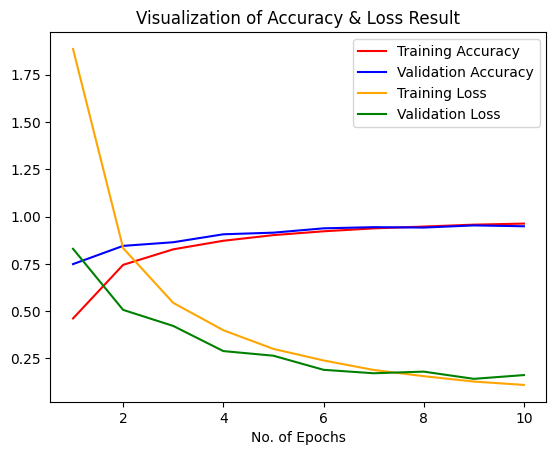

In [42]:
epochs = [i for i in range(1,11)]

plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy & Loss Result')
plt.legend()
plt.show()

plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.plot(epochs,training_history.history['loss'],color='orange',label='Training Loss')
plt.plot(epochs,training_history.history['val_loss'],color='green',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy & Loss Result')
plt.legend()
plt.show()

## Some other matrices on model evaluations

In [47]:
class_name = validation_set.class_names

In [48]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [50]:
y_pred = model.predict(test_set)
y_pred

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 837s 48ms/step


array([[9.9995828e-01, 2.3549260e-06, 9.3621306e-09, ..., 3.6768404e-11,
        1.2530159e-12, 2.0301444e-08],
       [9.9997997e-01, 1.4466680e-05, 1.4149062e-09, ..., 4.5501783e-11,
        1.1925828e-12, 1.9368205e-08],
       [9.9999845e-01, 1.7556619e-07, 3.0381060e-09, ..., 1.8207036e-14,
        3.1565083e-14, 3.0735825e-10],
       ...,
       [2.0250231e-10, 5.5128336e-13, 6.3986566e-10, ..., 1.3623390e-11,
        1.0548323e-11, 9.9998546e-01],
       [3.1656622e-08, 2.5337166e-11, 1.4784466e-09, ..., 6.1722669e-11,
        6.0231230e-12, 9.9997675e-01],
       [1.7256450e-15, 5.9930429e-16, 2.9528176e-15, ..., 1.5196954e-16,
        3.3415307e-14, 1.0000000e+00]], dtype=float32)

In [51]:
y_pred.shape

(17572, 38)

In [54]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [55]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [57]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

2024-09-02 13:59:38.143037: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [58]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

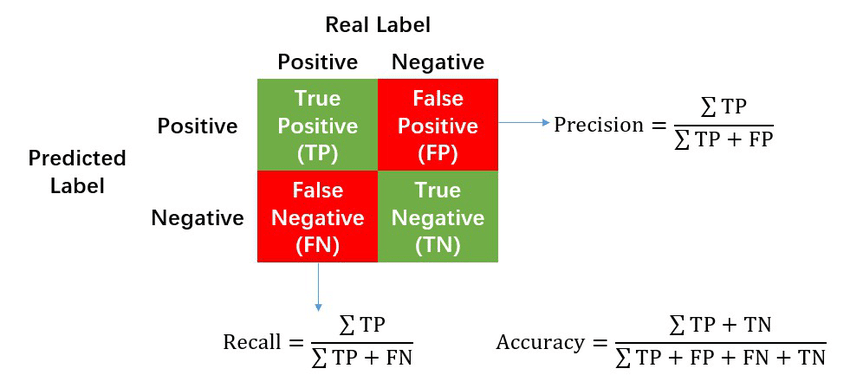

In [60]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 2.5 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:00:01


In [62]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.90      0.94       504
                                 Apple___Black_rot       0.97      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.90      0.99      0.95       440
                                   Apple___healthy       0.97      0.93      0.95       502
                               Blueberry___healthy       0.95      0.96      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.95      0.97       421
                 Cherry_(including_sour)___healthy       0.93      0.99      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.93      0.91       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.93      0.

In [61]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [66]:
cm

array([[455,   6,   9, ...,   0,   0,   0],
       [  0, 488,   0, ...,   0,   0,   0],
       [  0,   0, 436, ...,   0,   0,   0],
       ...,
       [  0,   0,   1, ..., 482,   0,   0],
       [  0,   0,   0, ...,   1, 435,   1],
       [  0,   0,   2, ...,   0,   0, 475]])

### Confusion Matrix Visualization

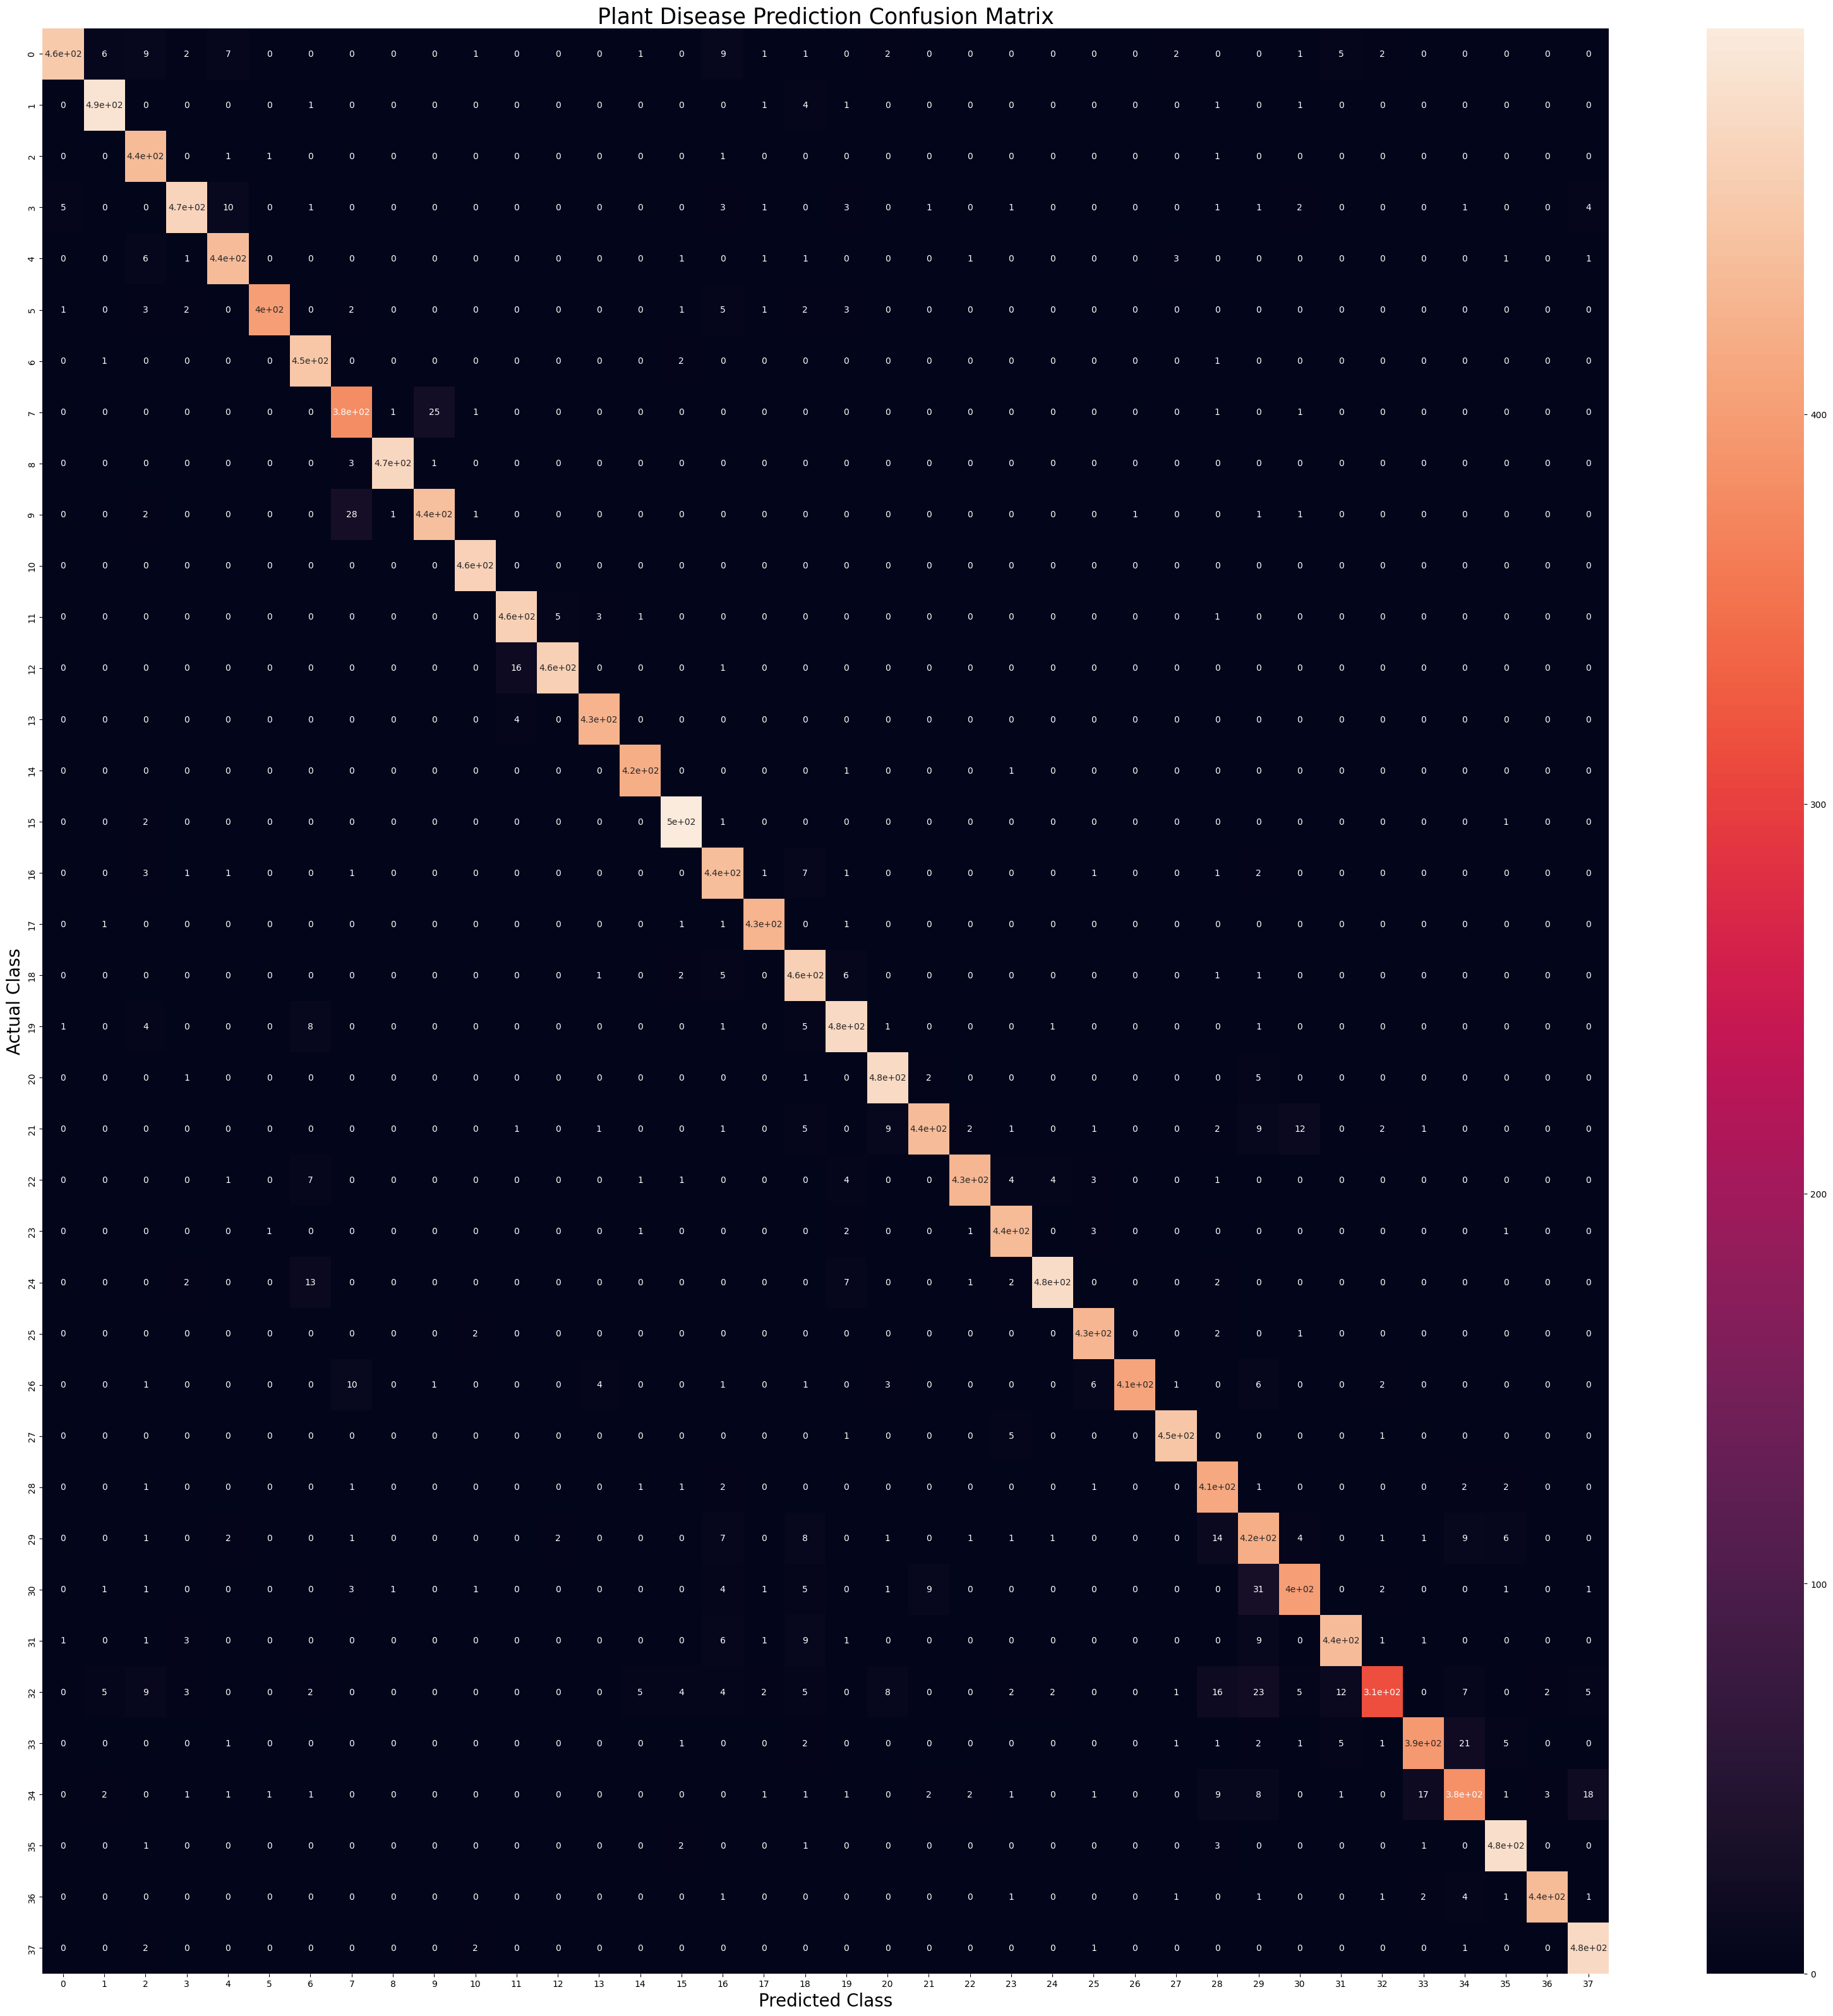

In [63]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()